<a href="https://colab.research.google.com/github/TaeMD/ML-projects/blob/main/Titanic_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [ ]:
! pip install kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c titanic

In [8]:
import random
random.seed(1234)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
train_df = pd.read_csv('train.csv')
test_df  = pd.read_csv('test.csv')

In [14]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_df.info()

In [ ]:
train_df.describe()

In [ ]:
test_df.describe()

In [18]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [19]:
plt.style.use('ggplot')

In [20]:
train_df[['Embarked', 'Survived','PassengerId']]

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [21]:
train_df[['Embarked', 'Survived','PassengerId']].dropna()

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [22]:
train_df[['Embarked', 'Survived','PassengerId']].dropna().groupby(['Embarked', 'Survived']).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

In [25]:
embarked_df = train_df[['Embarked', 'Survived','PassengerId']].dropna().groupby(['Embarked', 'Survived']).count().unstack()
embarked_df

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

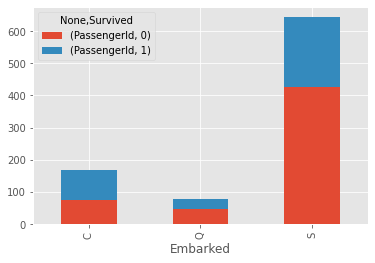

In [28]:
embarked_df.plot.bar(stacked=True)

In [37]:
embarked_df['survival_rate'] = embarked_df.iloc[:, 0] / (embarked_df.iloc[:,0]+embarked_df.iloc[:,1])

In [38]:
embarked_df

PassengerId      survival_rate
Survived           0    1              
Embarked                               
C                 75   93      0.446429
Q                 47   30      0.610390
S                427  217      0.663043

In [40]:
embarked_df.iloc[0, :] 

               Survived
PassengerId    0           75.000000
               1           93.000000
survival_rate               0.446429
Name: C, dtype: float64

In [44]:
train_df[['Sex', 'Pclass', 'Survived']]

,Sex,Pclass,Survived
0,male,3,0
1,female,1,1
2,female,3,1
3,female,1,1
4,male,3,0
...,...,...,...
886,male,2,0
887,female,1,1
888,female,3,0
889,male,1,1


In [55]:
train_df[['Sex',  'Survived', 'PassengerId']].dropna().groupby(['Sex',  'Survived']).count()

PassengerId
Sex    Survived             
female 0                  81
       1                 233
male   0                 468
       1                 109

In [52]:
train_df[['Sex',  'Survived', 'PassengerId']].dropna().groupby(['Sex',  'Survived']).count().unstack()

PassengerId     
Survived           0    1
Sex                      
female            81  233
male             468  109

In [53]:
sex_df = train_df[['Sex',  'Survived', 'PassengerId']].dropna().groupby(['Sex',  'Survived']).count().unstack()

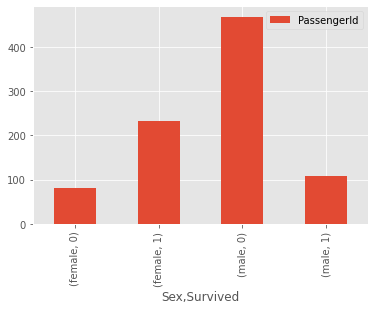

In [51]:
sex_df.plot.bar(stacked=True)

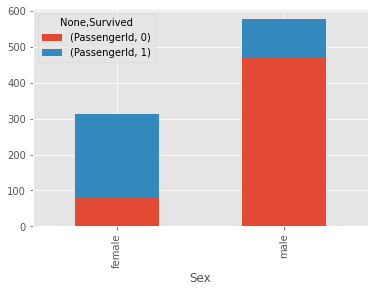

In [54]:
sex_df.plot.bar(stacked=True)